##### 모델링 : 함수 찾기
- 집의 평수를 알면 가격을 알수있을까?
- Y = aX + b
- 데이터를 잘 설명하는 직선 하나를 찾는것이 모델링
##### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 1인지 맞출수 있을까?
- 아주복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정
##### ANN 인공신경망
- 단일층 : 신경망이 하나 퍼셉트론  1x1 -> 뉴런

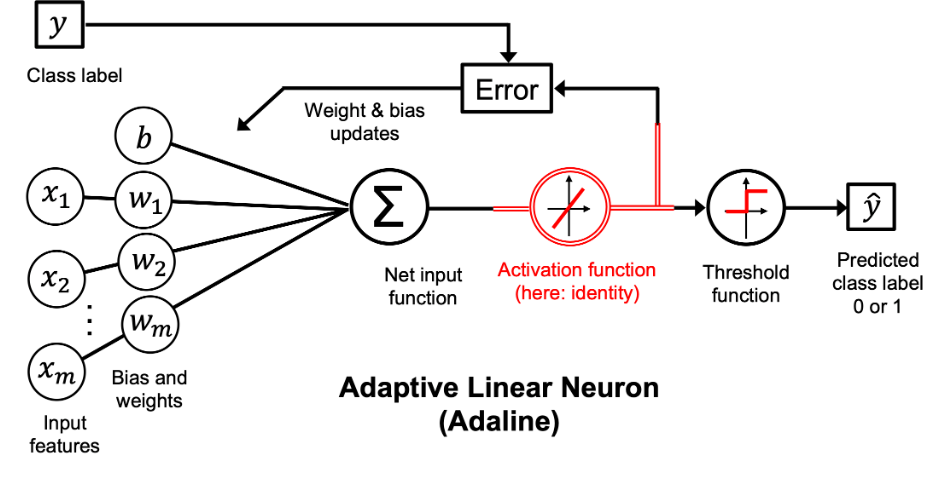


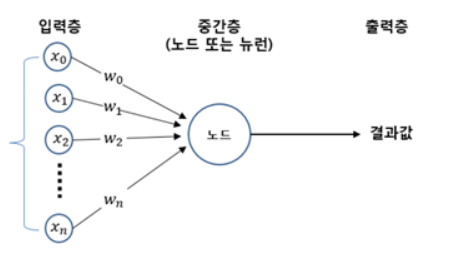

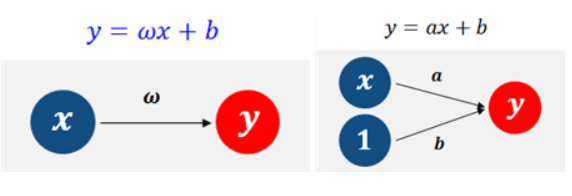

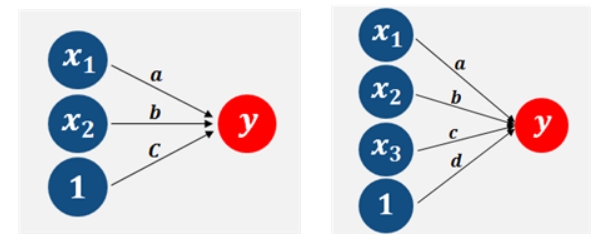

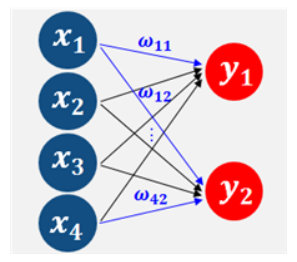
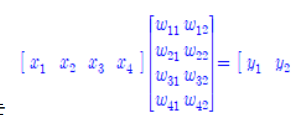

#### 활성화함수...
- 계단함수
- 시그모이드 : 연속적인 값을 출력 - 미분이 가능 - 오차 역전파
- 활성화 함수가 없다... f(z) = z
- y = (W100 x .... W1)X  --> 거대한 1층짜리 선형모델
- 초기 활성화 함수  스위치
    - 계단함수  if x > 0  1
    -             x <=   0

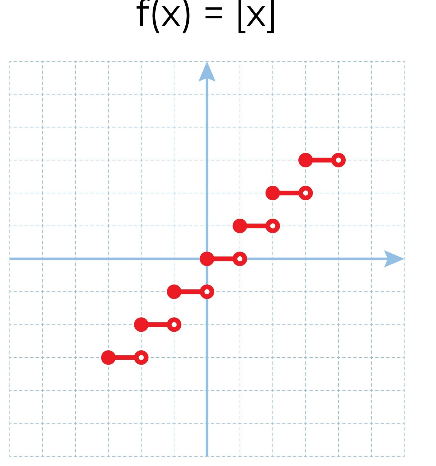    

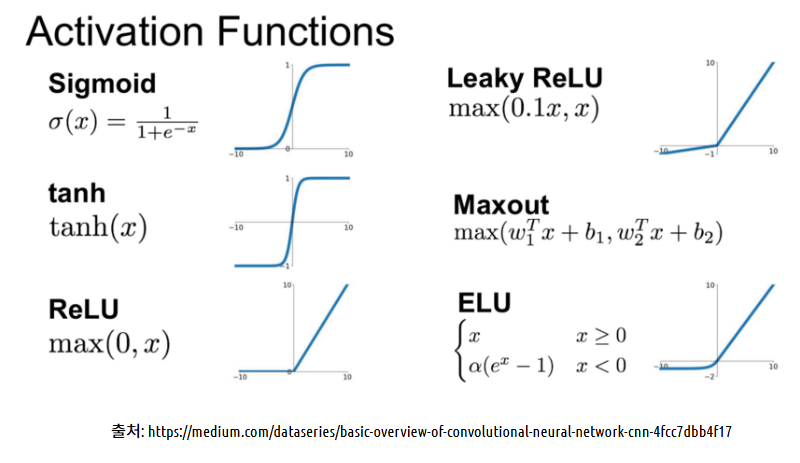

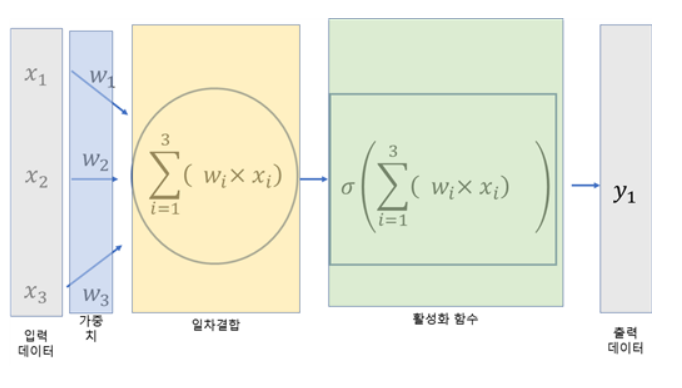

##### 다층신경망  MLP 퍼셉트론을 여러개 쌓아서 올린구조
 - input layer : 데이터가 들어오는곳(뉴런수 데이터의 특성 28x28 = 784)
 - hidden layer : 입력과 출력 사이에 있는 레이어

In [1]:
%conda install tensorflow

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\playdata2\miniconda3\envs\deep

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.1.0              |  py311haa95532_0         249 KB
    astunparse-1.6.3           |             py_0          17 KB
    c-ares-1.34.5              |       h731ff69_0         217 KB
    flatbuffers-24.3.25        |       h21716d4_0         1.6 MB
    gast-0.6.0                 |     pyhd3eb1b0_0          25 KB
    google-pasta-0.2.0         |     pyhd3eb1b0_0          46 KB
    grpcio-1.71.0              |  py311hbb1fe6b_0         1.0 MB
    h5py-3.14.0                |  py311h6fc9867_0         1.2 MB
    hdf5-1.14.5                |       ha36df97_2         2.1 MB
    keras-3.6.0                |  py311h

In [3]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# X,y = fetch_openml('mnist_784',version=1 ,return_X_y=True, parser='auto')


In [8]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
print(y_train[20])
plt.imshow(x_train[20],cmap='gray')  
print(x_train[20])

In [18]:
# 스케일링 표준화
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [22]:
model = tf.keras.Sequential([
    # 1층 입력층  28 x 28 2D -->784 1D
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 2층 은닉층 
    tf.keras.layers.Dense(128,activation = 'relu'),
    # 출력층
    tf.keras.layers.Dense(10,activation = 'sigmoid')    
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer = 'adam', # 빠르고 안정적인
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
model.fit(
    x_train,
    y_train,
    epochs = 5,
    validation_data = (x_test, y_test),
    verbose = 1  # 로그 출력
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8801 - loss: 0.4276 - val_accuracy: 0.9583 - val_loss: 0.1390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9640 - loss: 0.1215 - val_accuracy: 0.9672 - val_loss: 0.1109
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0756 - val_accuracy: 0.9727 - val_loss: 0.0915
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0579 - val_accuracy: 0.9750 - val_loss: 0.0763
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.9763 - val_loss: 0.0773
